In [1]:
!pip install -U scikit-learn
!pip install blackboxauditing
%pip install scikit-learn
!pip install tensorflow

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aif360 0.4.0 requires scipy<1.6.0,>=1.2.0, but you have scipy 1.7.3 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [2]:
print("Which Data Set did You Select? : Using Loan Approval set found here https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set?resource=download")
print("Which regulated domain does your dataset belong to? : The regulated domain is Credit")
print("How many observations are in the dataset? : There are 614 Observations")
print("How many variables in the dataset? : There are 13 Variables")
print("Which variables did you select as your dependent variables? : The dependent variable that i've chosen were Loan Amount and Loan_Status")
print("How many and which variables in the dataset are associated with a legally recognized protected class? : There are Two protected class, Sex (Equal Pay Act of 1963; Civil Rights Act of 1964, 1991) \nand Familial status (Civil Rights Act of 1968)")

Which Data Set did You Select? : Using Loan Approval set found here https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set?resource=download
Which regulated domain does your dataset belong to? : The regulated domain is Credit
How many observations are in the dataset? : There are 614 Observations
How many variables in the dataset? : There are 13 Variables
Which variables did you select as your dependent variables? : The dependent variable that i've chosen were Loan Amount and Loan_Status
How many and which variables in the dataset are associated with a legally recognized protected class? : There are Two protected class, Sex (Equal Pay Act of 1963; Civil Rights Act of 1964, 1991) 
and Familial status (Civil Rights Act of 1968)


Table 2.1: Membership Category

|Category| | |
| --- | --- | --- |
| Sex | Male | Female |
| Familial Status | Married | Not Married |

Table 2.2 Numerical Value

|Dependent Variable| | | | | | | |
| --- | --- | --- | | | | | |
| Loan Amount | 0-100 | 101-200 | 201-300 | 301-400 | 500+ |
| Loan Status | 0 (Yes) | 1 ( No) | ---   | ---     | ---  |

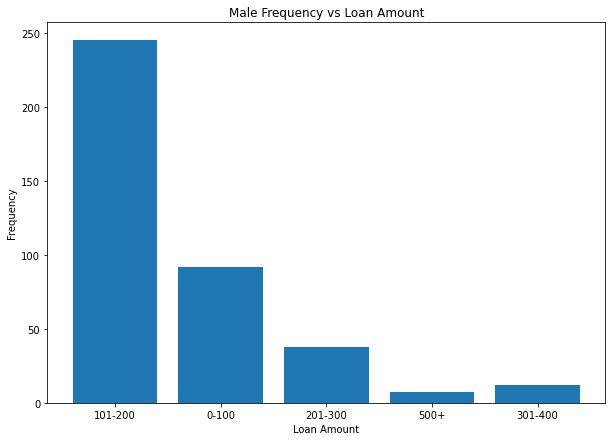

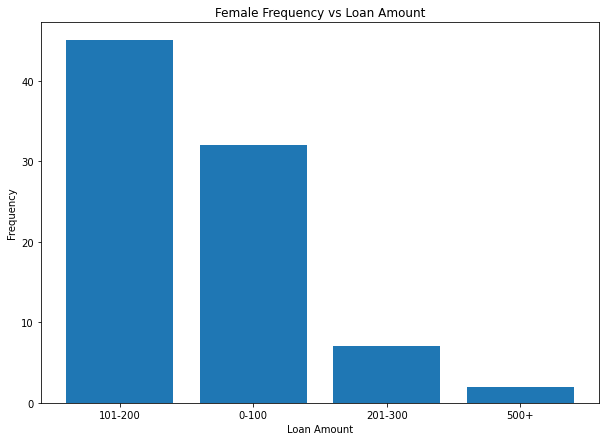

   Loan_Status  Gender  Freq
0            2    Male   278
1            3    Male   116
2            2  Female    54
3            3  Female    32


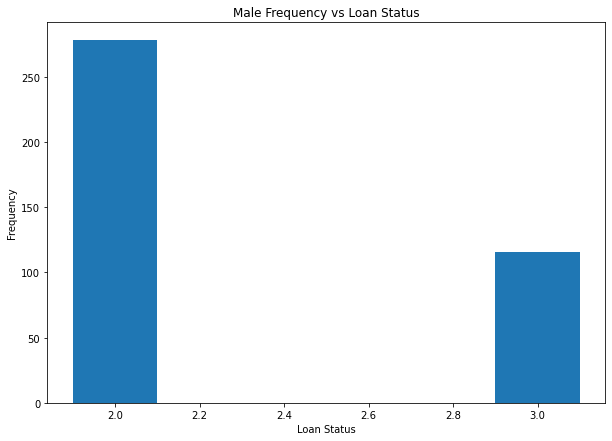

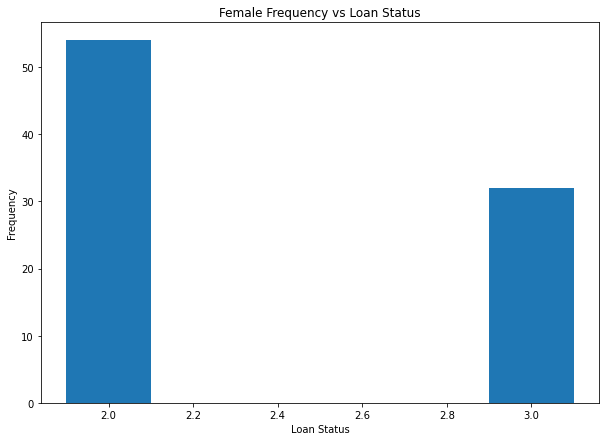

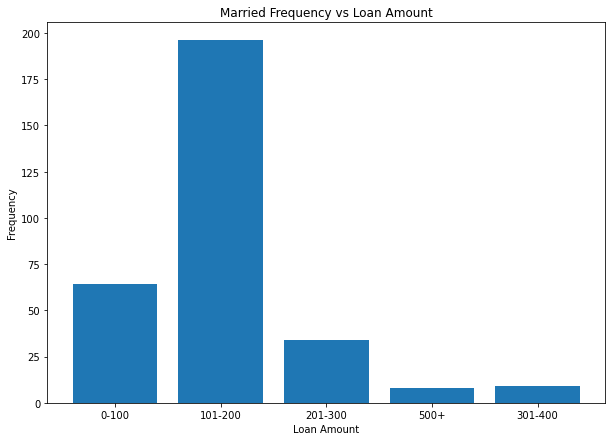

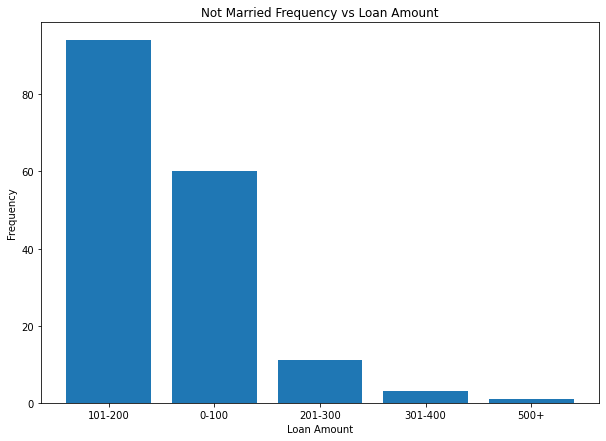

   Loan_Status Married  Freq
0            2     Yes   227
1            2      No   105
2            3     Yes    84
3            3      No    64


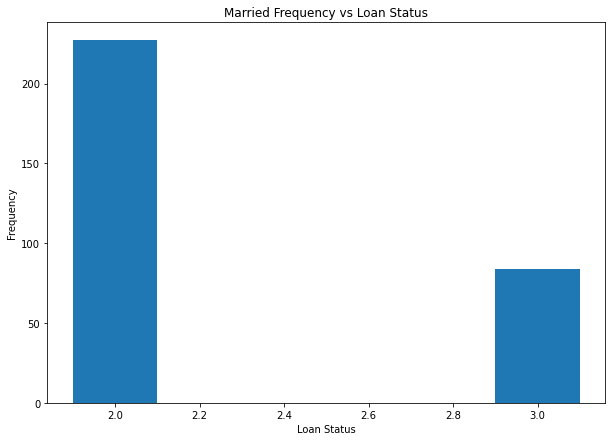

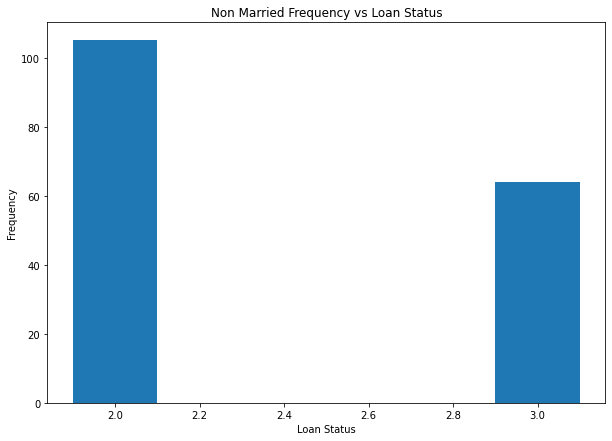

In [3]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import sklearn


df = pd.read_csv('C:\\Users\\voxmi\\Downloads\\Loan_Train.csv')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df = df.dropna()

df['Loan_Status']= df['Loan_Status'].replace(["Y"],2)
df['Loan_Status']= df['Loan_Status'].replace(['N'],3)
#print(df[['Gender']].value_counts())
#print(df[['Married']].value_counts())

#print(df.dtypes)
loanData = df[['LoanAmount',"Gender"]].value_counts().reset_index(name="Freq")
loanApprove = df[['Loan_Status',"Gender"]].value_counts().reset_index(name="Freq")

male = collections.defaultdict(int)
female = collections.defaultdict(int)
#print(loanData)
for k,v,x in zip(loanData["LoanAmount"],loanData['Gender'],loanData['Freq']):
    if v == 'Male':
        if(k <= 100):
            male[("0-100")] += int(x)
        elif k > 100 and k <= 200:
            male[("101-200")] += int(x)
        elif k > 200 and k <= 300:
            male[("201-300")] += int(x)
        elif k> 300 and k <= 400:
            male[("301-400")] += int(x)
        else:
            male[("500+")] += int(x)
    else:
        if(k <= 100):
            female[("0-100")] += int(x)
        elif k > 100 and k <= 200:
            female[("101-200")] += int(x)
        elif k > 200 and k <= 300:
            female[("201-300")] += int(x)
        elif k> 300 and k <= 400:
            female[("301-400")] += int(x)
        else:
            female[("500+")] += int(x)

#Male
fig, ax = plt.subplots(figsize =(10, 7))
temp = [j for i,j in male.items()]
temp2 = [i for i,j in male.items()]
ax.bar(temp2,temp)
plt.title("Male Frequency vs Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


#Female
fig, ax2 = plt.subplots(figsize =(10, 7))
temp = [j for i,j in female.items()]
temp2 = [i for i,j in female.items()]
ax2.bar(temp2,temp)
plt.title("Female Frequency vs Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

#Gender
print(loanApprove)
fig, ax = plt.subplots(figsize =(10, 7))
ax.bar([2,3],[278,116],0.2)
plt.title("Male Frequency vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()
fig, ax2 = plt.subplots(figsize =(10, 7))
ax2.bar([2,3],[54,32],0.2)
plt.title("Female Frequency vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

#Married
loanData = df[['LoanAmount',"Married"]].value_counts().reset_index(name="Freq")
loanApprove = df[['Loan_Status',"Married"]].value_counts().reset_index(name="Freq")

married = collections.defaultdict(int)
nonmarried = collections.defaultdict(int)
#print(loanData)
for k,v,x in zip(loanData["LoanAmount"],loanData['Married'],loanData['Freq']):
    if v == 'Yes':
        if(k <= 100):
            married[("0-100")] += int(x)
        elif k > 100 and k <= 200:
            married[("101-200")] += int(x)
        elif k > 200 and k <= 300:
            married[("201-300")] += int(x)
        elif k> 300 and k <= 400:
            married[("301-400")] += int(x)
        else:
            married[("500+")] += int(x)
    else:
        if(k <= 100):
            nonmarried[("0-100")] += int(x)
        elif k > 100 and k <= 200:
            nonmarried[("101-200")] += int(x)
        elif k > 200 and k <= 300:
            nonmarried[("201-300")] += int(x)
        elif k> 300 and k <= 400:
            nonmarried[("301-400")] += int(x)
        else:
            nonmarried[("500+")] += int(x)

#Married
fig, ax = plt.subplots(figsize =(10, 7))
temp = [j for i,j in married.items()]
temp2 = [i for i,j in married.items()]
ax.bar(temp2,temp)
plt.title("Married Frequency vs Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


#Not Married
fig, ax2 = plt.subplots(figsize =(10, 7))
temp = [j for i,j in nonmarried.items()]
temp2 = [i for i,j in nonmarried.items()]
ax2.bar(temp2,temp)
plt.title("Not Married Frequency vs Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

#Married Status
print(loanApprove)
fig, ax = plt.subplots(figsize =(10, 7))
ax.bar([2,3],[227,84],0.2)
plt.title("Married Frequency vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()
fig, ax2 = plt.subplots(figsize =(10, 7))
ax2.bar([2,3],[105,64],0.2)
plt.title("Non Married Frequency vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

Table 2.3 Computed Frequency

|Category| Male| Female| Married | Not Married | 
| --- | --- | --- | | |
| Sex | 394 | 86 | - | - | 
| Familial Status | - | - | 311 | 169 |

table 3.1 priv and unpriv

|Category| privileged | unprivileged|
| --- | --- | --- |
| Sex | Male | Female |
| Familial Status | Married | Not Married |

In [4]:
#Question 3
loanData = df[['LoanAmount',"Gender","Loan_Status"]]
male_prob = collections.defaultdict(int)
female_prob = collections.defaultdict(int)
for k,v,x in zip(loanData["LoanAmount"],loanData['Gender'],loanData['Loan_Status']):
    if v == 'Male':
        if x == 2:
            male_prob[2] += 1
        else:
            male_prob[3] += 1
    else:
        if x == 2:
            female_prob[2] += 1
        else:
            female_prob[3] += 1
# print(len(loanData))
# print(male_prob)
# print(female_prob)
#Disparate 
DI = female_prob[2]/(female_prob[2] + female_prob[3]) / (male_prob[2]/(male_prob[2] + male_prob[3]))
#print(DI)
#Statistical Parity
StatPar = female_prob[2]/(female_prob[2] + female_prob[3]) - ((male_prob[2]/(male_prob[2] + male_prob[3])))
#print(StatPar)


loanData = df[['LoanAmount',"Married","Loan_Status"]]
marr_prob = collections.defaultdict(int)
unmarr_prob = collections.defaultdict(int)
for k,v,x in zip(loanData["LoanAmount"],loanData['Married'],loanData['Loan_Status']):
    if v == 'Yes':
        if x == 2:
            marr_prob[2] += 1
        else:
            marr_prob[3] += 1
    else:
        if x == 2:
            unmarr_prob[2] += 1
        else:
            unmarr_prob[3] += 1


#Disparate 
DI = unmarr_prob[2]/(unmarr_prob[2] + unmarr_prob[3]) / (marr_prob[2]/(marr_prob[2] + marr_prob[3]))
#print(DI)
#Statistical Parity
StatPar = unmarr_prob[2]/(unmarr_prob[2] + unmarr_prob[3]) - ((marr_prob[2]/(marr_prob[2] + marr_prob[3])))
#print(StatPar)


#Diparate Remover Own Formula
df.Loan_ID =pd.to_numeric(df.Loan_ID, errors ='coerce').fillna(0).astype('int')
df.Dependents =pd.to_numeric(df.Dependents, errors ='coerce').fillna(0).astype('int')
df.Education =pd.to_numeric(df.Education, errors ='coerce').fillna(0).astype('int')
df.Self_Employed =pd.to_numeric(df.Self_Employed, errors ='coerce').fillna(0).astype('int')
df.Property_Area =pd.to_numeric(df.Property_Area, errors ='coerce').fillna(0).astype('int')


transformData = df.copy()
transformData['Gender']= transformData['Gender'].replace(["Male"],0)
transformData['Gender']= transformData['Gender'].replace(['Female'],1)
transformData['Married']= transformData['Married'].replace(["Yes"],0)
transformData['Married']= transformData['Married'].replace(['No'],1)

#Transform Data via AI360 DisparateImpactRemove
import aif360
import sklearn
from aif360.algorithms.preprocessing import DisparateImpactRemover
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=2,
    unfavorable_label=3,
    df=transformData,
    label_names=['Loan_Status'],
    protected_attribute_names=['Gender'])

di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]

#print(transformed)
loanData = transformed[['LoanAmount',"Gender","Loan_Status"]]
male_prob = collections.defaultdict(int)
female_prob = collections.defaultdict(int)
for k,v,x in zip(loanData["LoanAmount"],loanData['Gender'],loanData['Loan_Status']):
    if v == 0:
        if x == 2:
            male_prob[2] += 1
        else:
            male_prob[3] += 1
    else:
        if x == 2:
            female_prob[2] += 1
        else:
            female_prob[3] += 1
 #Disparate 
DI = female_prob[2]/(female_prob[2] + female_prob[3]) / (male_prob[2]/(male_prob[2] + male_prob[3]))
#print(DI)
#Statistical Parity
StatPar = female_prob[2]/(female_prob[2] + female_prob[3]) - ((male_prob[2]/(male_prob[2] + male_prob[3])))
#print(StatPar)           

loanData = transformed[['LoanAmount',"Married","Loan_Status"]]
t_Mar = collections.defaultdict(int)
t_UMar = collections.defaultdict(int)
for k,v,x in zip(loanData["LoanAmount"],loanData['Married'],loanData['Loan_Status']):
    if v == 0:
        if x == 2:
            t_Mar[2] += 1
        else:
            t_Mar[3] += 1
    else:
        if x == 2:
            t_UMar[2] += 1
        else:
            t_UMar[3] += 1

#Disparate 
#DI = t_UMar[2]/(t_UMar[2] + unmarr_prob[3]) / (t_Mar[2]/(t_Mar[2] + t_Mar[3]))
#print(DI)
#Statistical Parity
StatPar = t_UMar[2]/(t_UMar[2] + t_UMar[3]) - ((t_Mar[2]/(t_Mar[2] + t_Mar[3])))
#print(StatPar)


##### For Some reason even though i ran the AI360 DIRemover it still produced the same results for the DI and Stastical parity
##Not sure if its because im doing it wrong or its suppose to be like that??

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


table 3.2 Di and Statistical Parity of Loan Amount + Loan Status


|Category| DI | Statistical Parity|
| --- | --- | --- |
| Sex (unpriv(female)/priv(male)) | 0.8899113267525515 | -0.07767677960099162 |
| Familial Status (unpriv(Not Married)/Priv(Married)) | 0.8512108020749158 | -0.10860176182956305 |

table 3.4 Di and Statistical Parity + DI Remover of Loan Amount + Loan Status

|Category| DI | Statistical Parity|
| --- | --- | --- |
| Sex (unpriv(female)/priv(male)) | 0.8899113267525515 | -0.07767677960099162 |
| Familial Status (unpriv(Not Married)/Priv(Married)) | 0.8512108020749158 | -0.10860176182956305 |

In [ ]:
#Question 4

df['Married']= df['Married'].replace(["Yes"],1)
df['Married']= df['Married'].replace(['No'],0)
df_split = df[0:len(df):3]
df_train = pd.concat([df, df_split]).drop_duplicates(keep=False)
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
ls = [i for i in df_train['Loan_Status']]
m = [i for i in df_train['Married']]
trainer = list(zip(ls,m))
model = GNBclf.fit(trainer,df_train['Loan_Status'])
preds = GNBclf.predict(trainer)
marr_prob = collections.defaultdict(int)
unmarr_prob = collections.defaultdict(int)

for k,v in zip(m,preds):
    if k == 0:
        if v == 2:
            marr_prob[2] += 1
        else: 
            marr_prob[3] += 1
    else:
        if x == 2:
            unmarr_prob[2] += 1
        else:
            unmarr_prob[3] += 1


#Disparate 
DI = unmarr_prob[2]/(unmarr_prob[2] + unmarr_prob[3]) / (marr_prob[2]/(marr_prob[2] + marr_prob[3]))
#print(DI)
#Statistical Parity
StatPar = unmarr_prob[2]/(unmarr_prob[2] + unmarr_prob[3]) - ((marr_prob[2]/(marr_prob[2] + marr_prob[3])))
#print(StatPar)




#Transformed Data Set
df_split = df[0:len(transformed):3]
df_train = pd.concat([transformed, df_split]).drop_duplicates(keep=False)
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
ls = [i for i in df_train['Loan_Status']]
m = [i for i in df_train['Married']]
trainer = list(zip(ls,m))
model = GNBclf.fit(trainer,df_train['Loan_Status'])
preds = GNBclf.predict(trainer)
marr_prob = collections.defaultdict(int)
unmarr_prob = collections.defaultdict(int)

for k,v in zip(m,preds):
    if k == 0:
        if v == 2:
            marr_prob[2] += 1
        else: 
            marr_prob[3] += 1
    else:
        if x == 2:
            unmarr_prob[2] += 1
        else:
            unmarr_prob[3] += 1


#Disparate 
DI = unmarr_prob[2]/(unmarr_prob[2] + unmarr_prob[3]) / (marr_prob[2]/(marr_prob[2] + marr_prob[3]))
#print(DI)
#Statistical Parity
StatPar = unmarr_prob[2]/(unmarr_prob[2] + unmarr_prob[3]) - ((marr_prob[2]/(marr_prob[2] + marr_prob[3])))
#print(StatPar)

table 4.4.1 Di and Statistical Parity of original + classifer

|Category| DI | Statistical Parity|
| --- | --- | --- |
| Familial Status (unpriv(Not Married)/Priv(Married)) | 0.0 | -0.5803571428571429 |

table 4.4.2 Di and Statistical Parity of Transformed Data set + classifer

|Category| DI | Statistical Parity|
| --- | --- | --- |
| Familial Status (unpriv(Not Married)/Priv(Married)) | 0.0 | -0.7240437158469946 |

#Question 4

1) the privileged/unprivileged groups for this section i used was the Familial Status, with the unpriviledgfed group being the unmarried and the priviliged group being married\
2) The dependent variable chosen was the Loan Status\
3) Refer to table 4.4.1 and 4.4.2 for the quantitiative results\
4) As seen on the table below the difference between step 4 and step 3.4 were very negative. The Di became 0.0 for the classifier steps 4, compared to the regular no classifier of 0.85 -> indicating that there was a -0.85 change in the DI value; While for the Statistical Parity the values were -0.5 and -0.72 respecitively founded in step 4. but compared to step 3.4 of -0.1 there were heavy negative changes of -.4 and -.62.

table 4.4.3 Difference between transformed and classifier DI and Stat Parity

|Category| DI | Statistical Parity|
| --- | --- | --- |
| Familial Status (unpriv(Not Married)/Priv(Married)) | -0.8512108020749158 | -0.4840437158469946 |

table 4.4.4 Difference between transformed and classifier DI and Stat Parity

|Category| DI | Statistical Parity|
| --- | --- | --- |
| Familial Status (unpriv(Not Married)/Priv(Married)) | -0.8512108020749158 | -0.6240437158469946 |